In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data = torch.tensor(iris[iris.columns[0:4]].values).float()

labels = torch.zeros(len(data), dtype=torch.long)

labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2

In [8]:
class ANNiris(nn.Module):
    def __init__(self, nUnits, nLayers):
        super().__init__()

        self.layers = nn.ModuleDict()
        self.nLayers = nLayers

        self.layers['input'] = nn.Linear(4, nUnits)

        for i in range(nLayers):
            self.layers[f'hidden{i}'] = nn.Linear(nUnits, nUnits)

        self.layers['output'] = nn.Linear(nUnits, 3)

    def forward(self, x):
        x = self.layers['input'](x)

        for i in range(self.nLayers):
            x = F.relu(self.layers[f'hidden{i}'](x))

        x = self.layers['output'](x)
        
        return x

In [9]:
nUnitsPerLayer = 12
nLayers = 4
net = ANNiris(nUnitsPerLayer, nLayers)
net

ANNiris(
  (layers): ModuleDict(
    (input): Linear(in_features=4, out_features=12, bias=True)
    (hidden0): Linear(in_features=12, out_features=12, bias=True)
    (hidden1): Linear(in_features=12, out_features=12, bias=True)
    (hidden2): Linear(in_features=12, out_features=12, bias=True)
    (hidden3): Linear(in_features=12, out_features=12, bias=True)
    (output): Linear(in_features=12, out_features=3, bias=True)
  )
)

In [10]:
tmpx = torch.randn(10,4)

y = net(tmpx)

print(y.shape), print(' ')

torch.Size([10, 3])
 


(None, None)

In [11]:
def trainTheModel(theModel):
    lossfun = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(params=theModel.parameters(), lr=.01)

    for epochi in range(numEpochs):
        yHat = theModel(data)

        loss = lossfun(yHat, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    predictions = theModel(data)
    predlabels = torch.argmax(predictions, axis=1)
    acc = 100*torch.mean((predlabels==labels).float())

    nParams = sum(p.numel() for p in theModel.parameters() if p.requires_grad)

    return acc, nParams

In [12]:
numEpochs = 2500
acc = trainTheModel(net)

acc

(tensor(98.), 723)

In [20]:
numlayers = range(1,6)
numunits = np.arange(4, 101, 3)

accuracies = np.zeros((len(numunits), len(numlayers)))
totalparams = np.zeros((len(numunits), len(numlayers)))

numepochs = 500

for unitidx in range(len(numunits)):
    for layeridx in range(len(numlayers)):

        net = ANNiris(numunits[unitidx], numlayers[layeridx])

        acc, nParams = trainTheModel(net)
        accuracies[unitidx, layeridx] = acc

        totalparams[unitidx, layeridx] = nParams

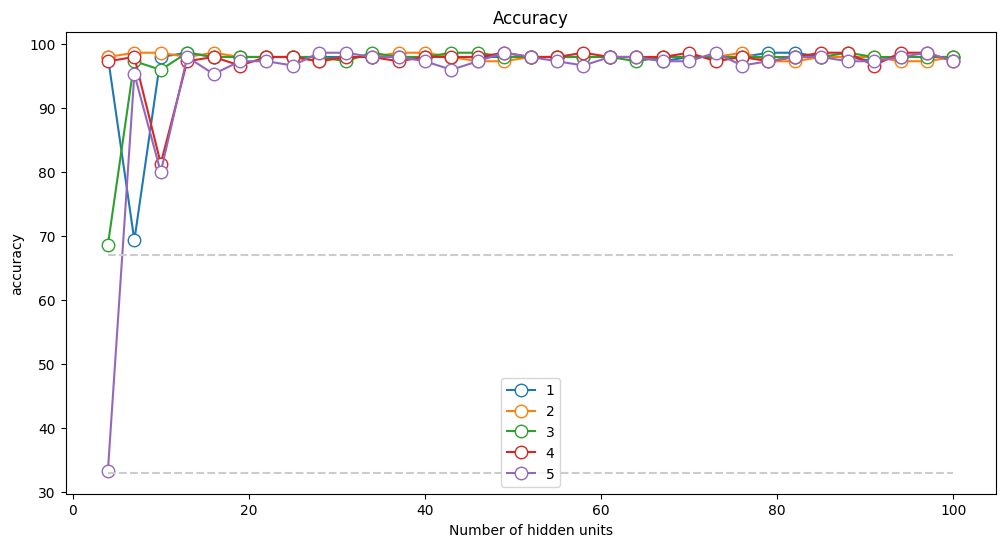

In [21]:
fig, ax = plt.subplots(1, figsize=(12,6))

ax.plot(numunits, accuracies, 'o-', markerfacecolor='w', markersize=9)
ax.plot(numunits[[0,-1]], [33,33], '--', color=[.8,.8,.8])
ax.plot(numunits[[0,-1]], [67,67], '--', color=[.8,.8,.8])
ax.legend(numlayers)
ax.set_ylabel('accuracy')
ax.set_xlabel('Number of hidden units')
ax.set_title('Accuracy')
plt.show()

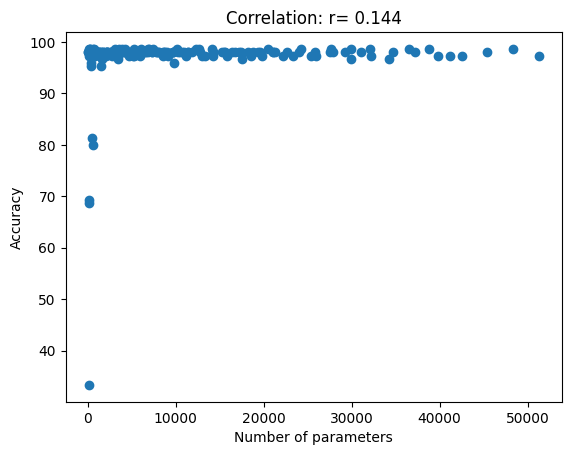

In [22]:
x = totalparams.flatten()
y = accuracies.flatten()

r = np.corrcoef(x,y)[0,1]

plt.plot(x,y,'o')
plt.xlabel('Number of parameters')
plt.ylabel('Accuracy')
plt.title('Correlation: r= ' + str(np.round(r,3)))
plt.show()